In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [50]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters):
    # Plot the TRE mean value and the [min-max] range.
    figTre, axTre = plt.subplots(1, 1)
    axTre.plot(mean_errors, color="black", label="Průměrná vzdálenost")
    axTre.fill_between(range(len(mean_errors)), min_errors, max_errors,
                     facecolor="red", alpha=0.5, label="Rozpětí vzdáleností")
    axTre.plot(multires_iters, mean_errors[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6., c="b")
    axTre.set_xlabel("Iterace [-]", fontsize=13)
    axTre.set_ylabel("Vzdálenost [mm]", fontsize=13)
    axTre.set_title("Míra nepřesnosti registrace", fontsize=15)
    axTre.set_xticks(np.arange(0, len(metric_values) + 1, 10))
    axTre.grid(alpha=0.5)
    axTre.legend()
    plt.show()
    
def plotMetricValues(metric_values, multires_iters):
    figMetric, axMetric = plt.subplots()
    axMetric.plot(range(0, len(metric_values)), metric_values, label="Vzájemná informace")
    axMetric.plot(multires_iters, metric_values[multires_iters], marker="o", 
                  label="Registrační úroveň", linestyle="none", 
                  markeredgecolor="none", markersize=6.)
    axMetric.set_xlabel("Iterace [-]", fontsize=13)
    axMetric.set_ylabel("Vzájemná informace [-]", fontsize=13)
    axMetric.set_title("Minimalizace podobnostní metriky", fontsize=15)
    axMetric.set_xticks(np.arange(0, len(metric_values) + 1, 10))
    axMetric.grid(alpha=0.5)
    axMetric.legend()
    plt.show()
    
def plotErrorHistogram(errors):
    fig, axHist = plt.subplots(1, 1)
    axHist.hist(errors[0, :], bins=12, alpha=0.5, label="Před registrací", color="blue")
    axHist.hist(errors[-1, :], bins=12, alpha=0.5, label="Po registraci", color="green")
    axHist.set_xlabel("Rozdíl vzdáleností [mm]", fontsize=13)
    axHist.set_ylabel("", fontsize=13)
    axHist.set_title("Rozložení míry nepřenosti registrace", fontsize=15)
    axHist.grid(alpha=0.5)
    axHist.legend()
    plt.show()

In [11]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))

In [12]:
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

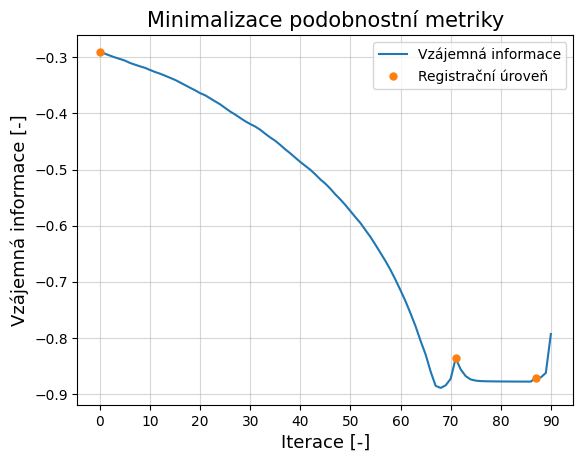

In [43]:
plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"])

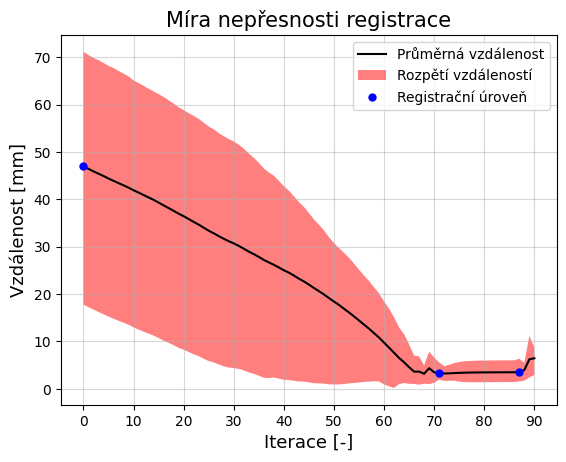

In [51]:
plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"])

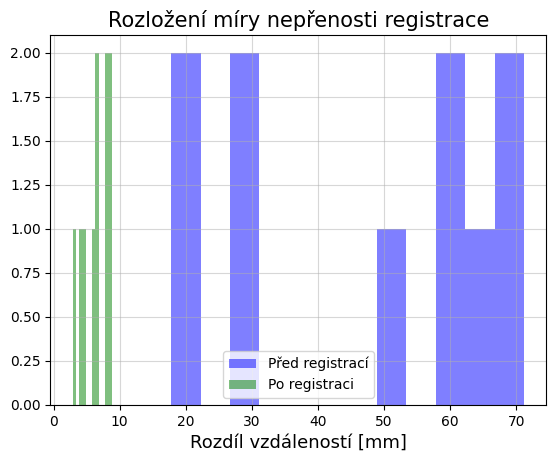

In [33]:
plotErrorHistogram(errorsInfo["errorValues"])

In [47]:
print(np.arange(0, len(regInfo["metricValues"])), regInfo["metricValues"], errorsInfo["meanValues"])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] [-0.29034051 -0.2935181  -0.2969131  -0.30013527 -0.30292133 -0.30590133
 -0.30997873 -0.31306624 -0.31608303 -0.31874839 -0.32252595 -0.3261062
 -0.32913564 -0.33272265 -0.33647236 -0.34024198 -0.34480757 -0.34951309
 -0.35426228 -0.35875061 -0.36384586 -0.36763043 -0.37308042 -0.37848292
 -0.3838281  -0.3902737  -0.3966567  -0.40202449 -0.40810844 -0.41387928
 -0.4188835  -0.4233671  -0.42915124 -0.43621803 -0.44284066 -0.44881239
 -0.45619819 -0.46406497 -0.47116341 -0.47895184 -0.4865402  -0.49356422
 -0.50040828 -0.50876648 -0.51765431 -0.52524637 -0.53429925 -0.54438659
 -0.5534136  -0.5634087  -0.574233   -0.58497742 -0.59544444 -0.60799666
 -0.62018479 -0.63425791 -0.64865332 -0.66318515 -0.67906361 -0.69